# **보스턴 집값 예측**

다음은 데이터 컬럼에 대한 소개입니다.

- CRIM : town 별 1인당 범죄율

- ZN : 25000 평방피트를 초과하는 거주지역의 비율

- INDUS : 비소매 상업지역이 점유하고 있는 토지의 비율

- CHAS : 찰스강에 대한 더미변수(강의 경계에 있으면 1, 아니면 0)

- NOX : 10ppm 당 일산화 질소 양

- RM : 주택 1가구당 평균 방의 개수

- AGE : 1940년 이전에 건축된 소유주택의 비율

- DIS : 5개의 보스턴 직업센터까지의 거리

- RAD : 방사형 도로 까지의 접근성 지수

- TAX : 10000 달러 당 제산세율

- PTRATIO : town 별 학생/교사 비율

- B : 1000(Bk - 0.63)^2 (Bk 는 town 별 흑인의 비율)

- LSTAT : 인구의 하위계층 비율(%)

- MEDV : 본인 소유의 주택가격 중앙값 (단위 1000$)

⇒ 비율이 데이터에 많다. (scale 이 다를 수도 있으니 scaling 을 해주어야 한다.)

⇒ 범주형 변수가 있어서 범주형 인코딩을 해주어야 한다.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())
os.chdir("/content/drive/MyDrive/ML_Session/")
print(os.getcwd())

/content
/content/drive/MyDrive/ML_Session


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel("./housing.xls")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.shape

(506, 14)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## EDA

### 결측치 여부

na : (not available) 값이 들어갈 자리는 있는데 값이 없음.

NaN : (Not a Number) 값이 들어갈 자리가 있는데, 계산상의 오류 때문에 값이 없음.
  
     (pandas에서는 `isna()`로 na, NaN 둘다 확인. 엄밀히 말하면 na가 NaN을 포함하는 개념)

NULL : 값이 들어갈 자리가 없음

In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# 위 코드를 한번에 보고 싶으면 아래와 같이 해도 됨.
# Series type이기 때문에 sum 하면 모든 column에 대해 더한 값이 나옴
print(type(data.isna().sum()))

print("<결측치 여부 확인> \n")
print("sum of na value : {} \nsum of null value : {}".format(data.isna().sum().sum(), data.isnull().sum().sum()))

<class 'pandas.core.series.Series'>
<결측치 여부 확인> 

sum of na value : 0 
sum of null value : 0


In [ ]:
# 결측치가 있는 row를 확인한다.
# 아래 코드가 익숙하지 않으신 분들은 boolean indexing을 검색해보세요 :)
data[data.isnull().any(axis = 1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


### etc.

In [ ]:
# 컬럼 내부에 고유한 값들이 얼마나 들어있는지 확인
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [ ]:
# 데이터 컬럼 확인
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# Descriptive Statistics(요약통계량)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 시각화

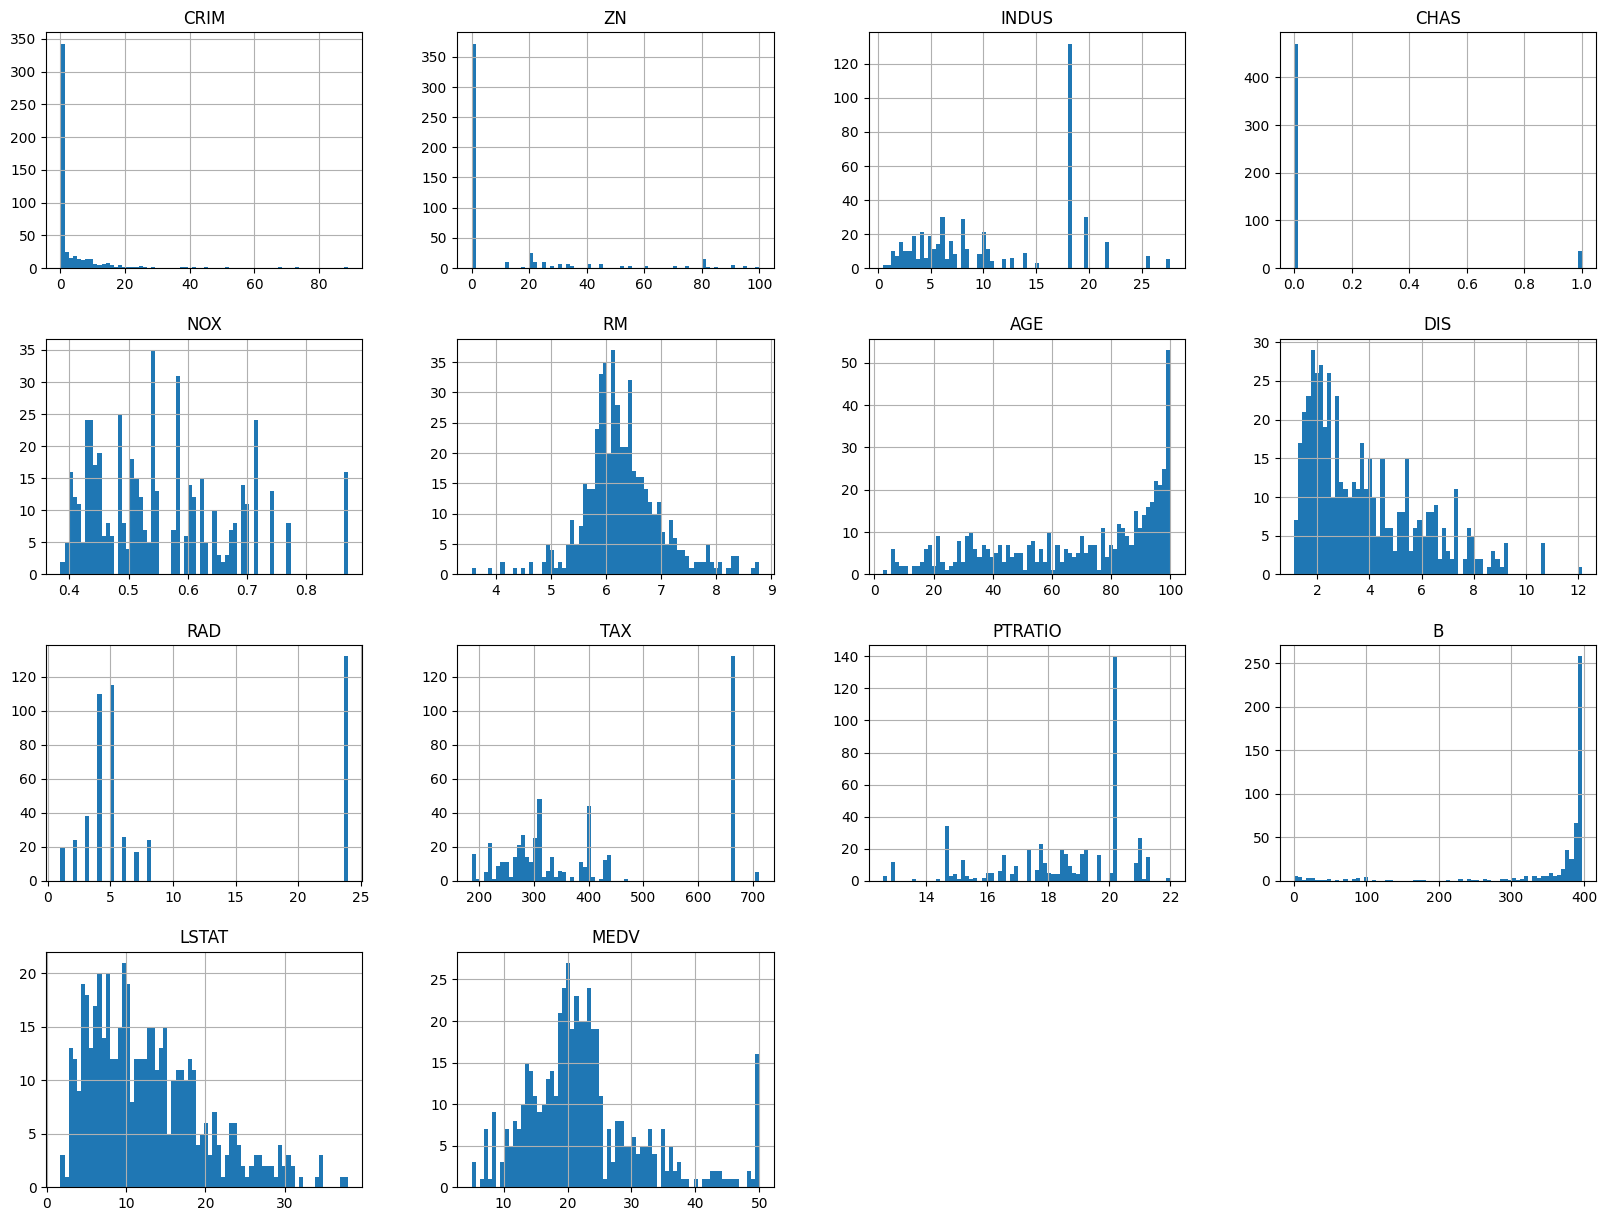

In [ ]:
# 히스토그램. 변수(컬럼)별 데이터의 분포 확인
data.hist(bins = 70, figsize = (20, 15))
plt.show()

⇒ RM : Gaussian Distribution?

⇒ DIS, LSTAT : Gamma/Beta/Weibull/Log-Normal Distribution?

⇒ MEDV : has large y's at the right end.

<Axes: >

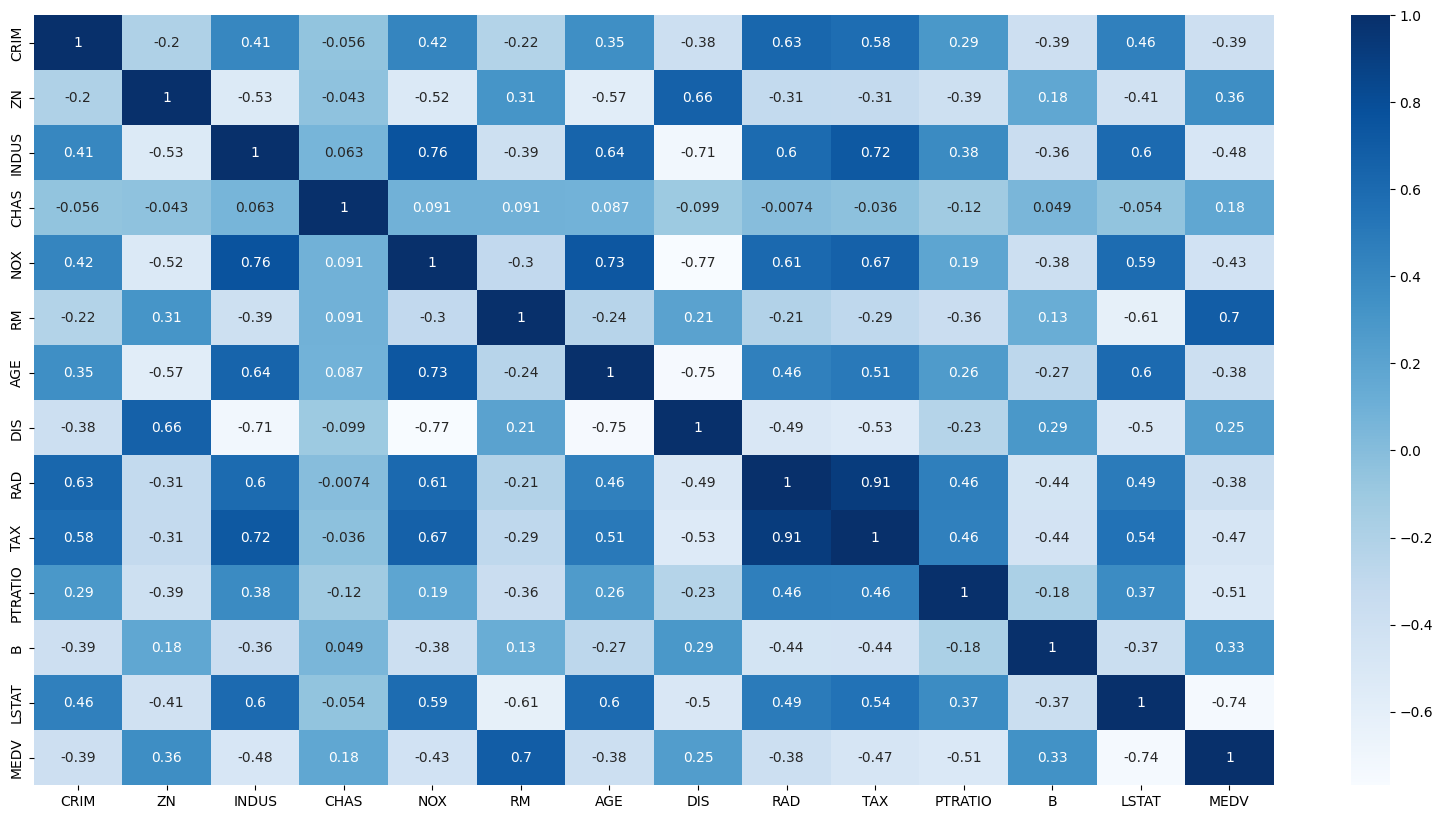

In [ ]:
# correlation plot
plt.figure(figsize = (20, 10))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = "Blues")

### Hypothesis Testing

In [1]:
import scipy
import scipy.stats
import math
from scipy.stats import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
def standardize(df, column, pct_upper, pct_lower):
  sc = StandardScaler()
  y = df[column].to_list()
  y.sort()
  len_y = len(y)

  y = y[int(pct_lower * len_y) : int(len_y * pct_upper)]
  len_y = len(y)
  y_bracket = ([[x] for x in y]) # Standard Sclaer 는 2D array를 받아야 하기 때문에 1D로 하면 에러남
  sc.fit(y_bracket) # 평균과 표준편차 계산
  y_std = sc.transform(y_bracket)
  y_std = y_std.flatten()
  return y_std, len_y, y

In [ ]:
def fit_distribution(df, column, pct_upper, pct_lower, bin_num=70, alpha = 0.05):
  """
  주어진 확률분포의 후보중에서, 가장 likelihood가 비슷하게 parameter optimization을 수행한뒤,
  데이터의 분포가 해당 parameter의 분포를 따르는지 가설검정을 Chi-Square Goodness of Fit 검정으로 수행함.
  """
  y_std, y_size, y_original = standardize(df, column, pct_upper, pct_lower)
  candidate_dist = ['weibull_min','norm','weibull_max','beta','gamma','lognorm',]
  chi_square_statistics = []
  chi_sqaure_statistics_alpha_upper = []
  chi_sqaure_statistics_alpha_lower = []
  data_follows_candidate = [] # H0 : 데이터가 해당 확률분포를 따름.

  # default : 70 bins
  # user-defined hyper-parameter that result of chi-square test depends on
  # need to be adjusted properly (caution)
  percentile_bins = np.linspace(0,100,bin_num)
  percentile_cutoffs = np.percentile(y_std, percentile_bins) # 0 ~ 100. 소수점 1자리. percentile 기준 데이터 row를 제거함. (outlier 제거 목적)
  observed_frequency, bins = (np.histogram(y_std, bins = percentile_cutoffs))
  cum_observed_frequency = np.cumsum(observed_frequency)

  # loop through candidate distributions
  for distribution in candidate_dist:
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std) # fit data with scipy's distribution with fitted hyper-parameters
    print("{}\n{}\n".format(dist, param))

    # Get expected counts in percentile bins for calculating Chi-Square test
    # cdf of fitted distribution across bins
    cdf_expected = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
      expected_cdf_area = cdf_expected[bin+1] - cdf_expected[bin]
      expected_frequency.append(expected_cdf_area)

    # Chi-Square Statistics
    # H0 : 데이터가 해당 확률분포를 따름.
    # 여기서 Observation : 데이터, Expectation : 확률분포 입니다.
    # 반드시 분포 검정을 Chi-Square Goodness of Fit Test로 수행하지 않아도 됩니다. 정상적으로 작동하는 setting을 만족하지 않아서 사용하지 못할수도 있습니다.
    # 그럼에도 Chi-Square Goodness of Fit Test는 분포 검정을 수행할때 매우 유용합니다.
    # 그러나 Chi-Square Test는 원래 분포 검정을 위해 수행되는 검정방법은 아닙니다. 그럼에도 불구하고 분포검정에 사용될 수 있죠. 왜그럴까요?
    # Hint : histogram, bin_num
    param_size = len(param)
    df = (bin_num -1) -1 - param_size
    chi_sqaure_statistics_alpha_upper.append(chi2(df).ppf(1-0.5*alpha))
    chi_sqaure_statistics_alpha_lower.append(chi2(df).ppf(0.5*alpha))

    expected_frequency = np.array(expected_frequency) * y_size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = round(sum(((cum_expected_frequency - cum_observed_frequency)**2)/cum_expected_frequency), 3)
    chi_square_statistics.append(ss)

    # 90.53 < chi2 statistics (bin_num = 71 기준) 에 chi2 statistics이 존재한다면 귀무가설을 기각하고,
    # chi2 statistics이 유의수준 alpha의 통계량 보다 작다면 귀무가설을 기각하지 못합니다.(데이터가 분포를 따른다는 가설을 채택합니다.)
    if chi_square_statistics < chi_sqaure_statistics_alpha_upper:
      data_follows_candidate.append(True)
    else :
      data_follows_candidate.append(False)

  # Sort by minimum chi-square statistics
  result = pd.DataFrame()
  result['Distribution'] = candidate_dist
  result['Chi-Square'] = chi_square_statistics
  result['Data follows candidate'] = data_follows_candidate
  result.sort_values(['Chi-Square'], inplace = True)

  print("\n Distributions listed by Betterment of fit:")
  print(".............................................")
  print(result)

🧑Notice : Chi Square Goodness of Fit이 무엇인지 공부해보고, 왜 해당 방법으로 분포 가설검정을 할 수 있는지 대답해보세요 :)




In [ ]:
# RM
fit_distribution(data, "RM", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(2.2895037664326123, -2.161156830783513, 2.4391564233068346)

(9.99444727222998e-16, 1.0)

(7.036329537505942, 5.906354378627053, 6.317988628808773)

(2.666976000533881, 4.659840027770218, -2.1809059232681234, 5.997023336393134)

(10.362406167070667, -3.2471861790136565, 0.313362119079578)

(0.20286377764808602, -4.919332674533308, 4.819473977607387)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
4        gamma      19.264                   False
0  weibull_min      19.772                   False
5      lognorm      22.856                   False
2  weibull_max      26.381                   False
3         beta      27.433                   False
1         norm     160.859                   False


In [ ]:
# DIS
fit_distribution(data, "DIS", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(1.1733284284824854, -1.2666504058703396, 1.3347939850598982)

(-1.2493059090287476e-16, 1.0)

(140023532.10470885, 105273688.536161, 105273688.99653134)

(0.6925018676312292, 1.618558005740166, -1.2649277485359798, 3.9551376050731584)

(1.2245089728457499, -1.267198182266995, 1.034850499529866)

(0.7789487294910731, -1.4576986347497796, 1.1114444959977416)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
4        gamma      41.408                    True
0  weibull_min      54.427                    True
5      lognorm     167.741                    True
3         beta     185.482                    True
2  weibull_max    1167.814                    True
1         norm    3571.462                    True


In [ ]:
# LSTAT
fit_distribution(data, "LSTAT", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(1.486158094909508, -1.5215077576913374, 1.677628426680081)

(3.123264772571869e-16, 1.0)

(65.90251607941728, 53.08701683798003, 53.551762056359834)

(1.0853124103830636, 2.0043169760023347, -1.4919991422340126, 4.261378376541812)

(1.9618621988959841, -1.5652323485479853, 0.797829579382749)

(0.43768394826046275, -2.3666149621971426, 2.1575808859125045)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
3         beta       5.956                    True
0  weibull_min      63.197                    True
4        gamma      78.089                    True
5      lognorm     227.585                    True
2  weibull_max     376.387                    True
1         norm    1318.728                    True


In [ ]:
# MEDV
fit_distribution(data, "MEDV", pct_upper = 0.95, pct_lower = 0.05, bin_num = 70, alpha = 0.05)

(1.9562997524378387, -1.8834699780450443, 2.122267265149505)

(2.498611818057495e-16, 1.0)

(14.881313661481247, 12.101101270492688, 12.537032010320406)

(2.909648763550582, 10.12712299348065, -2.0142424295166688, 9.024479220362982)

(5.758912630671846, -2.4215500948165847, 0.42048763902179487)

(0.2788940151678918, -3.5478761747613374, 3.4130406618929614)


 Distributions listed by Betterment of fit:
.............................................
  Distribution  Chi-Square  Data follows candidate
0  weibull_min      61.524                    True
3         beta      66.783                    True
4        gamma      70.511                    True
5      lognorm      75.016                    True
2  weibull_max      77.988                    True
1         norm     311.205                    True


Is chi-square goodness of fit testing not adequate setting for this data?



## Preprocessing

In [ ]:
scale_columns = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS','TAX', 'PTRATIO', 'B', 'LSTAT']
scaler = MinMaxScaler()
data[scale_columns] = scaler.fit_transform(data[scale_columns])

In [ ]:
X = data.drop(["MEDV"], axis = 1)
y = data["MEDV"]

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modeling

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_

19.97575365541803

In [ ]:
coef = pd.DataFrame([X_train.columns, lm.coef_]).T
coef = coef.rename(columns = {0: "Variables", 1:"Coefficients"})
coef

,Variables,Coefficients
0,CRIM,-1.146914
1,ZN,0.834326
2,INDUS,0.339407
3,CHAS,3.119835
4,NOX,-1.784727
5,RM,2.847839
6,AGE,-0.304293
7,DIS,-2.915625
8,RAD,0.242727
9,TAX,-1.4652


## Regularization (Ridge, LASSO)

In [ ]:
# alpha 값에 따른 계수 변화 (Ridge)
from sklearn.linear_model import Ridge
alpha = np.logspace(-3, 1, 5)

dat = []
for i, a in enumerate(alpha):
  globals()[f"ridge_{i}"] = Ridge(alpha = a).fit(X_train, y_train)
  dat.append(pd.Series(np.hstack([globals()[f"ridge_{i}"].intercept_, globals()[f"ridge_{i}"].coef_])))

df_ridge = pd.DataFrame(dat, index = alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,19.975794,19.976161,19.979821,20.015886,20.328151
1,-1.146910,-1.146874,-1.146508,-1.142810,-1.104426
2,0.834311,0.834171,0.832778,0.819077,0.702938
3,0.339392,0.339260,0.337941,0.324880,0.209137
4,3.119715,3.118638,3.107916,3.005190,2.287396
5,-1.784694,-1.784394,-1.781399,-1.752032,-1.506224
6,2.847846,2.847903,2.848475,2.853987,2.892918
7,-0.304292,-0.304279,-0.304157,-0.302987,-0.294624
8,-2.915589,-2.915265,-2.912026,-2.880040,-2.596759
9,0.242724,0.242694,0.242391,0.239390,0.212325


In [ ]:
# alpha 값에 따른 계수 변화 (LASSO)
from sklearn.linear_model import Lasso
alpha = np.logspace(-3, 1, 5)

dat = []
for i, a in enumerate(alpha):
  globals()[f"lasso_{i}"] = Lasso(alpha = a).fit(X_train, y_train)
  dat.append(pd.Series(np.hstack([globals()[f"lasso_{i}"].intercept_, globals()[f"lasso_{i}"].coef_])))

df_lasso = pd.DataFrame(dat, index = alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,19.988132,20.099497,21.038660,23.384799,25.693315
1,-1.144951,-1.127305,-0.950028,-0.000000,-0.000000
2,0.829944,0.790525,0.449437,0.000000,0.000000
3,0.331888,0.264170,-0.000000,-0.000000,-0.000000
4,3.108273,3.004211,1.872356,0.000000,0.000000
5,-1.778488,-1.722365,-1.287680,-0.000000,-0.000000
6,2.847912,2.848552,2.895027,2.824798,0.000000
7,-0.301803,-0.279382,-0.065527,-0.000000,-0.000000
8,-2.909102,-2.850440,-2.201821,-0.000000,0.000000
9,0.241520,0.230655,0.140824,-0.077744,-0.283698


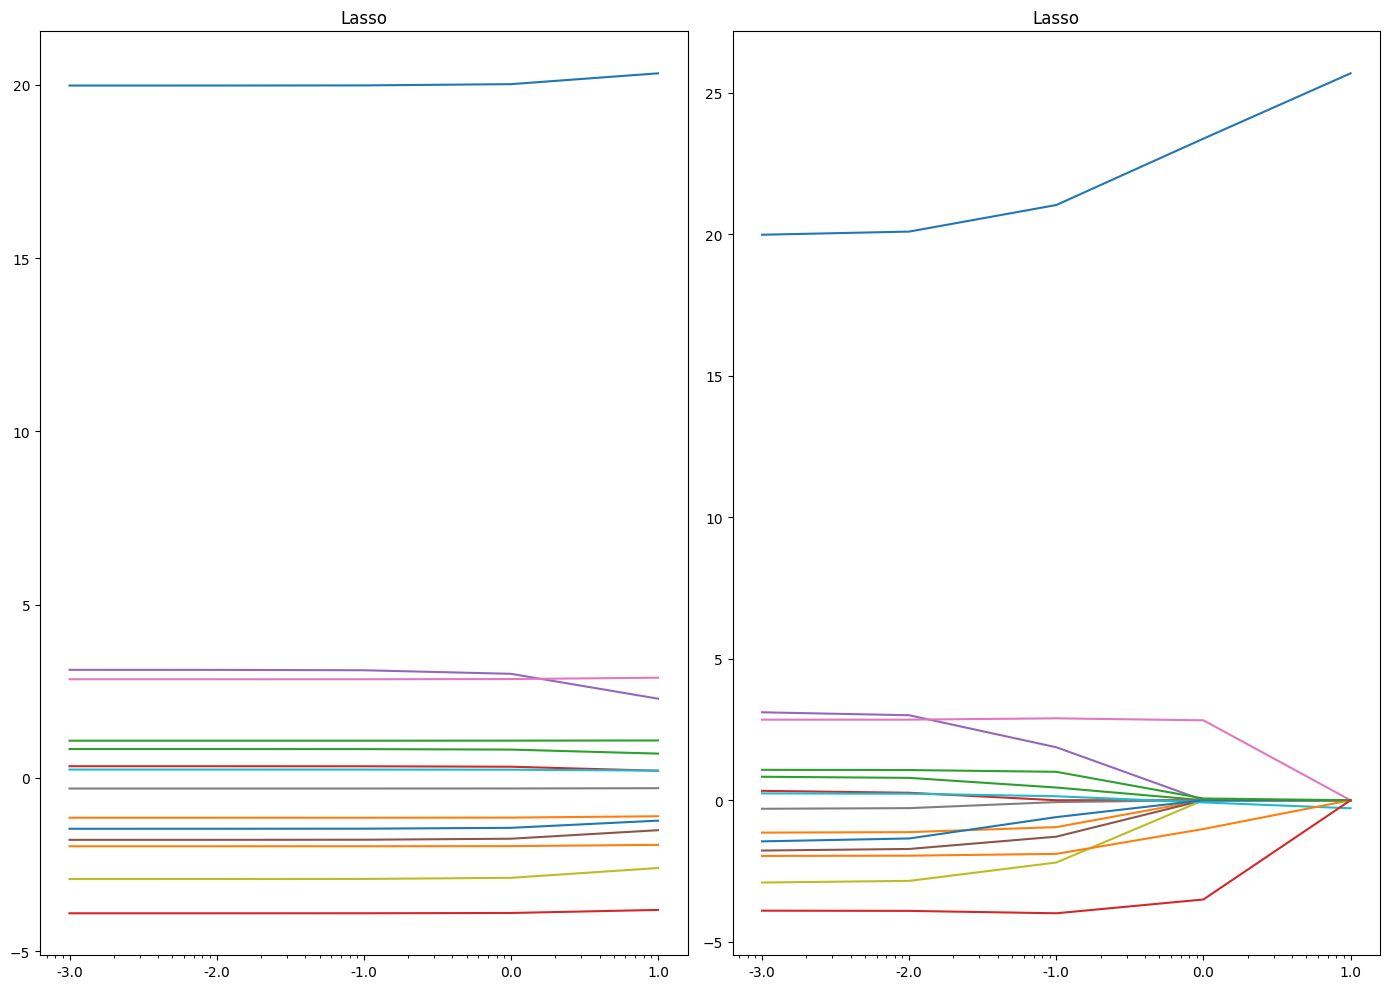

In [ ]:
# 시각화
fig = plt.figure(figsize = (14, 10))

# Ridge
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels = np.log10(alpha))
plt.title("Lasso")
# LASSO
ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels = np.log10(alpha))
plt.title("Lasso")

plt.tight_layout()
plt.show()

## Prediction

In [ ]:
y_pred_lm = lm.predict(X_test)

In [ ]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE:", mean_squared_error(y_test, y_pred_lm))
print("MAE:", mean_absolute_error(y_test, y_pred_lm))

MSE: 21.517444231177212
MAE: 3.1627098714574076


In [ ]:
for i in range(5):
  print(f"MSE of Ridge_{i}: {mean_squared_error(y_test, globals()[f'ridge_{i}'].predict(X_test))}")
  print(f"MAE of Ridge_{i}: {mean_absolute_error(y_test, globals()[f'ridge_{i}'].predict(X_test))}\n")

MSE of Ridge_0: 21.517435521889674
MAE of Ridge_0: 3.1627066182375403

MSE of Ridge_1: 21.517357281934995
MAE of Ridge_1: 3.1626773380190607

MSE of Ridge_2: 21.516589008714966
MAE of Ridge_2: 3.162384414095322

MSE of Ridge_3: 21.51023085250922
MAE of Ridge_3: 3.159783566545721

MSE of Ridge_4: 21.524525432109762
MAE of Ridge_4: 3.1429494708836065



In [ ]:
for i in range(5):
  print(f"MSE of Lasso_{i}: {mean_squared_error(y_test, globals()[f'lasso_{i}'].predict(X_test))}")
  print(f"MSE of Lasso_{i}: {mean_absolute_error(y_test, globals()[f'lasso_{i}'].predict(X_test))}\n")

MSE of Lasso_0: 21.516423402669226
MSE of Lasso_0: 3.161911921845312

MSE of Lasso_1: 21.51272445950457
MSE of Lasso_1: 3.155246873700849

MSE of Lasso_2: 22.018882176816902
MSE of Lasso_2: 3.164778356932858

MSE of Lasso_3: 27.275932977805294
MSE of Lasso_3: 3.7898833743916414

MSE of Lasso_4: 66.82973444651407
MSE of Lasso_4: 6.106058599890918

